In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

(None, None)

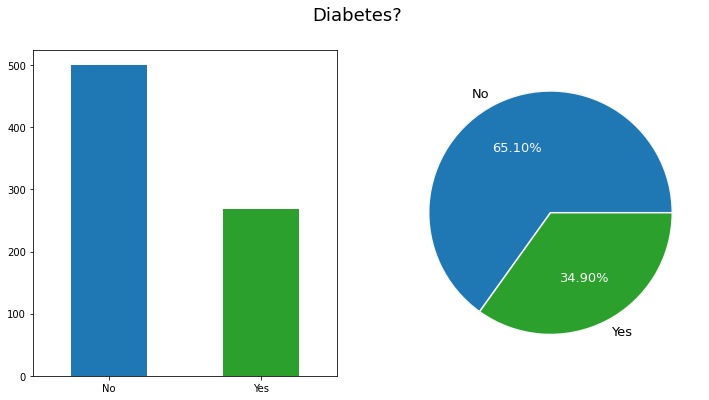

In [5]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Diabetes?", fontsize = 18.)
_ = dataset.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = dataset.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", 
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), 
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='Age', ylabel='Density'>

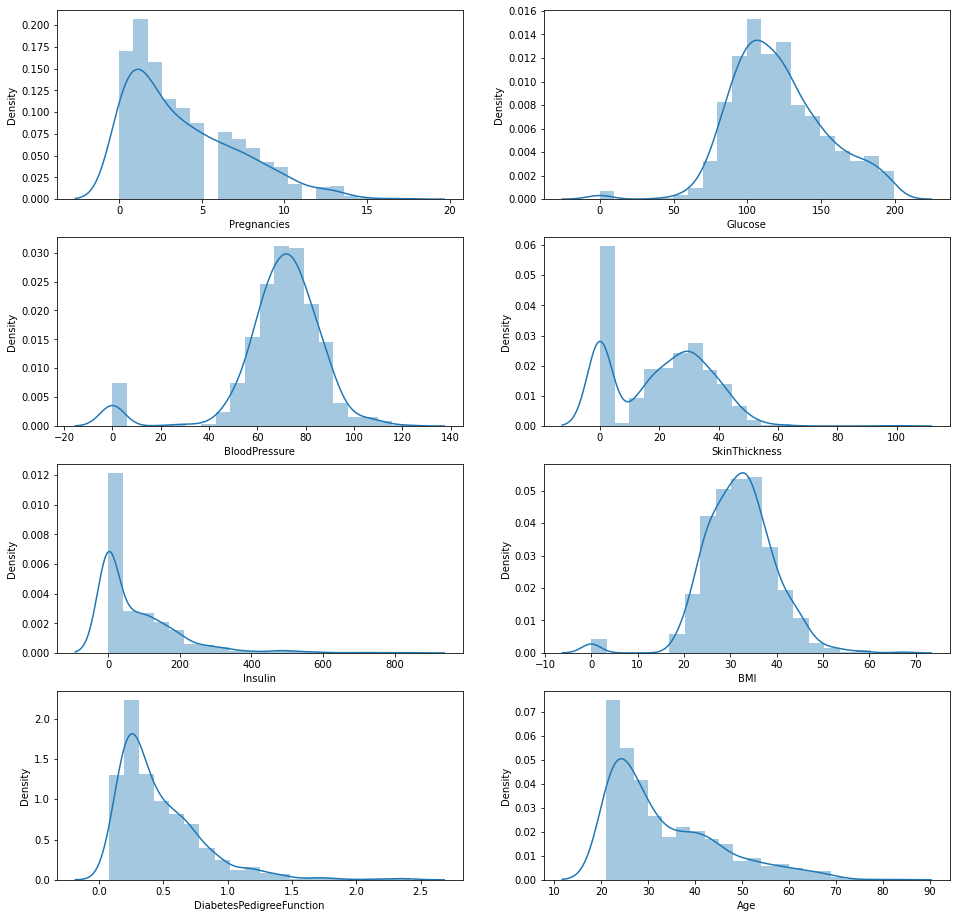

In [6]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dataset.Pregnancies, bins = 20, ax=ax[0,0]) 
sns.distplot(dataset.Glucose, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset.BloodPressure, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset.SkinThickness, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset.Insulin, bins = 20, ax=ax[2,0])
sns.distplot(dataset.BMI, bins = 20, ax=ax[2,1])
sns.distplot(dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dataset.Age, bins = 20, ax=ax[3,1])

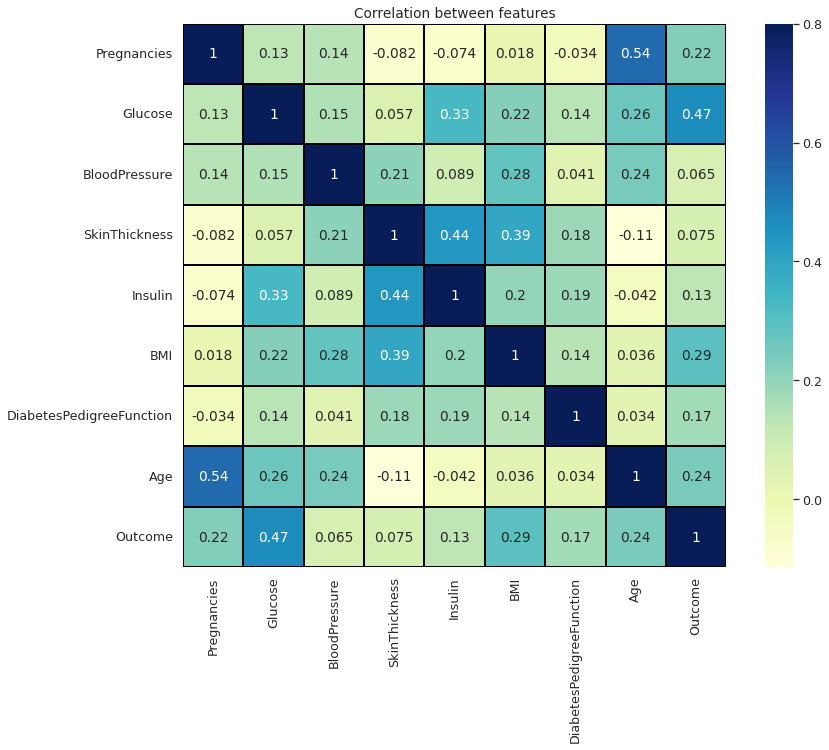

In [7]:
corr=dataset.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

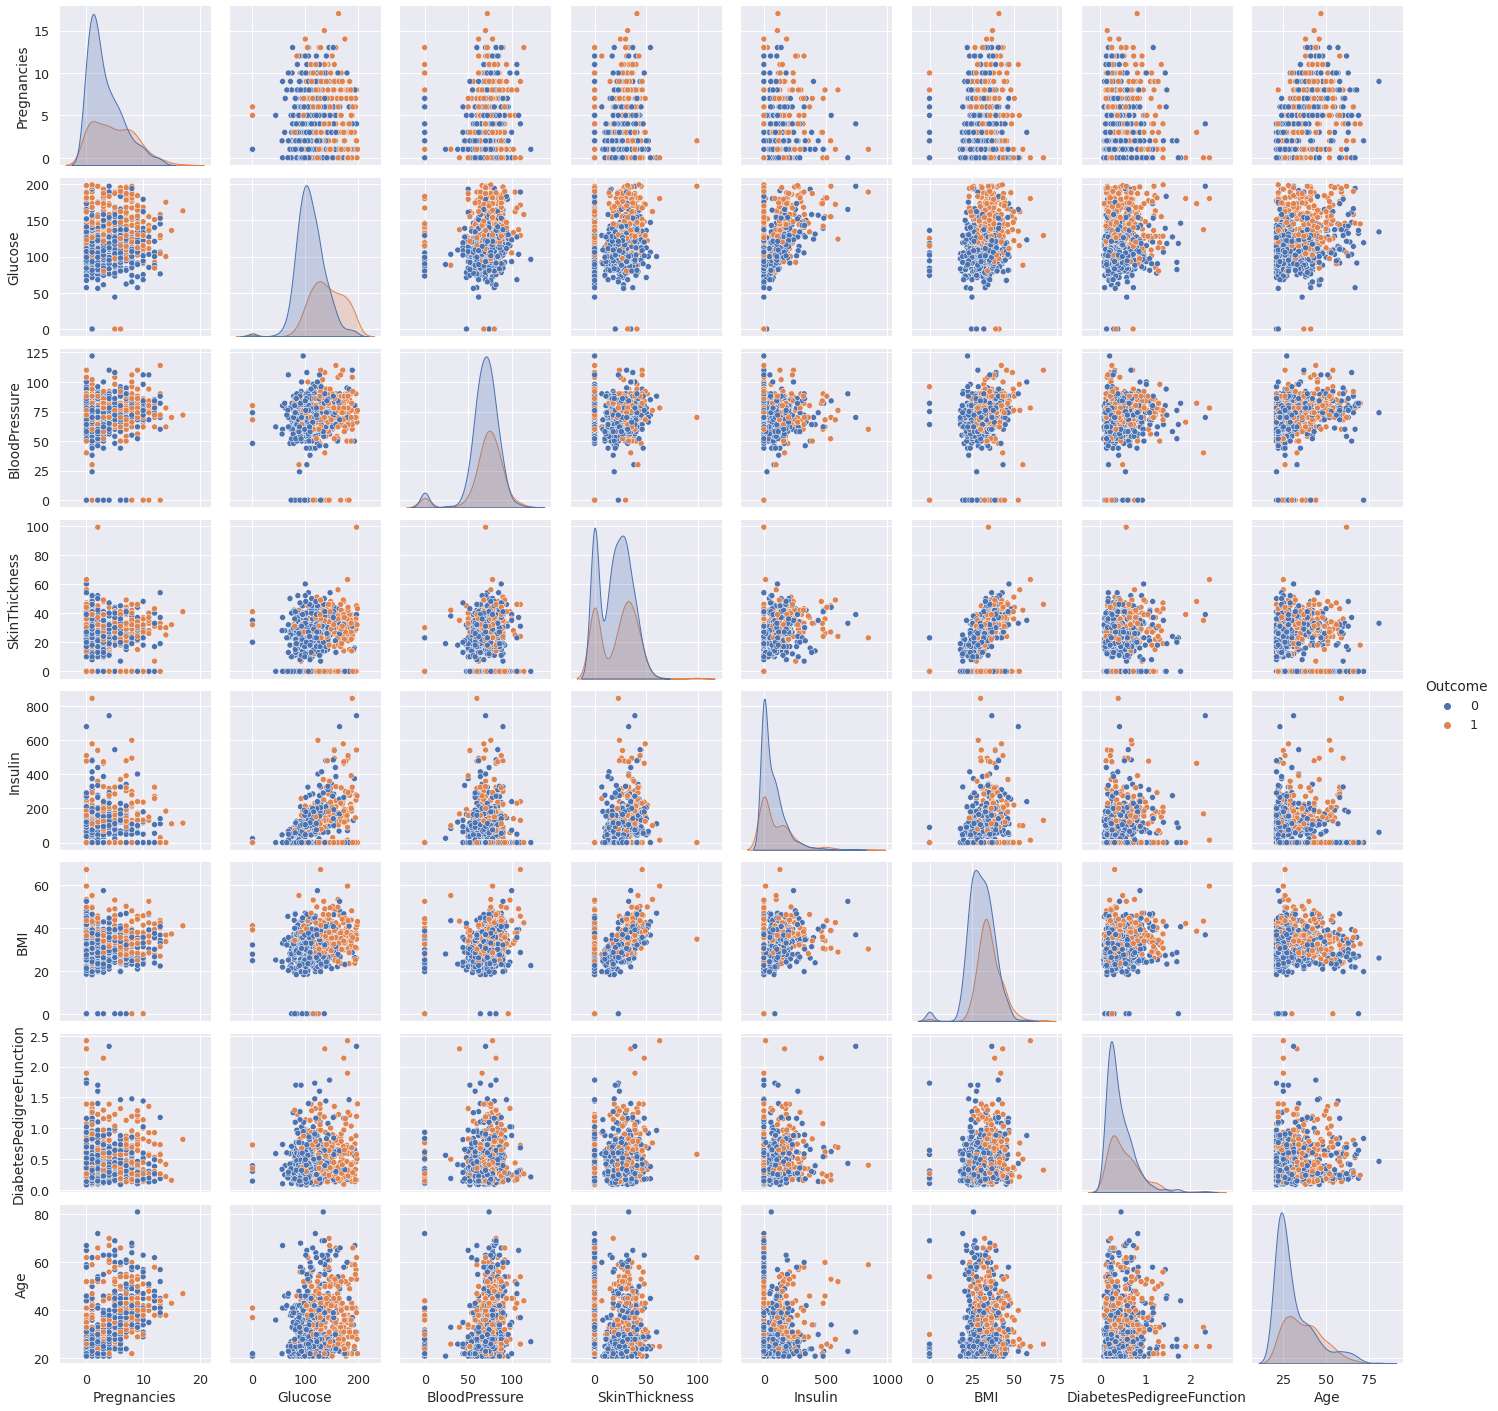

In [8]:
sns.pairplot(data=dataset, hue='Outcome')
plt.show()

In [9]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)

In [12]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='softmax'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

2022-03-03 15:52:48.286072: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

2022-03-03 15:52:48.777879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.2433 - accuracy: 0.6531 - val_loss: 0.2392 - val_accuracy: 0.6429
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.6531 - val_loss: 0.2304 - val_accuracy: 0.6429
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.6531 - val_loss: 0.2245 - val_accuracy: 0.6429
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.6531 - val_loss: 0.2195 - val_accuracy: 0.6429
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2140 - accuracy: 0.6531 - val_loss: 0.2138 - val_accuracy: 0.6429
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2075 - accuracy: 0.6531 - val_loss: 0.2073 - val_accuracy: 0.6429
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2010 - accuracy: 0.6531 - val_loss: 0.1995 - val_accuracy: 0.6494
Epoch 8/100


In [15]:
# Train and Test accuracy
scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.8192
Training Accuracy: 81.92%

5/5 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.8117
Testing Accuracy: 81.17%



In [16]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[89 10]
 [19 36]]


0.8116883116883117

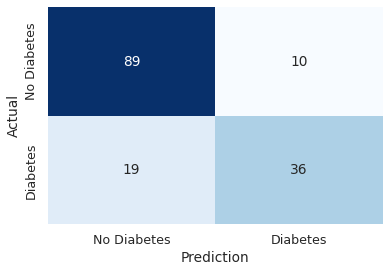

In [18]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [19]:
acc = hist.history['accuracy']
loss = hist.history['loss']

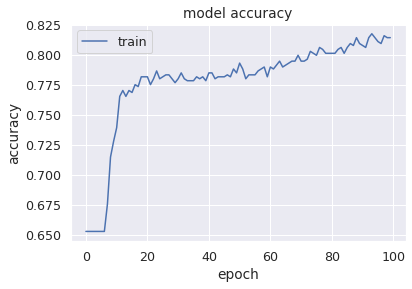

<Figure size 432x288 with 0 Axes>

In [20]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

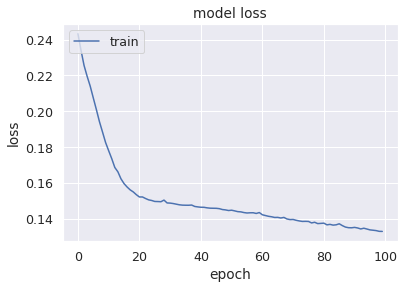

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')